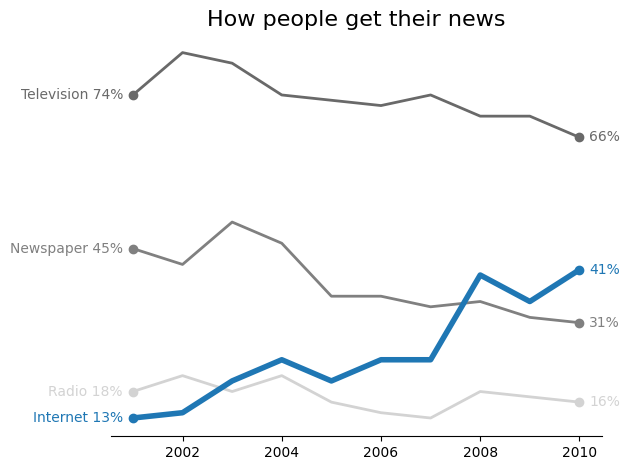

In [24]:
import pandas  as pd
import matplotlib.pyplot as plt
import os

output_path = "../files/plots/news.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

plt.Figure()

colors={
    'Television':'dimgray',
    'Newspaper':'gray',
    'Internet':'tab:blue',
    'Radio':'lightgray'
}

zorder={
    'Television':1,
    'Newspaper':1,
    'Internet':2,
    'Radio':1
}

linewidts={
    'Television':2,
    'Newspaper':2,
    'Internet':4,
    'Radio':2
}

df=pd.read_csv("../files/input/news.csv",index_col=0)
for col in df.columns:
    plt.plot(
        df[col],
        label=col,
        color=colors[col],
        zorder=zorder[col],
        linewidth=linewidts[col],
    )


plt.title("How people get their news",fontsize=16)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
#plt.legend(loc="upper right")

for col in df.columns:
    first_year=df.index[0]
    plt.scatter(
        x=first_year,
        y=df[col].loc[first_year],
        color=colors[col],
        zorder=zorder[col],
    )
    plt.text(
       first_year-0.2,
       df[col].loc[first_year],
       col+" "+str(df[col].loc[first_year])+"%",
       ha='right',
       va='center',
       color=colors[col],
    )

    last_year=df.index[-1]
    plt.scatter(
        x=last_year,
        y=df[col].loc[last_year],
        color=colors[col],
        zorder=zorder[col],
    )

    plt.text(
       last_year+0.2,
       df[col].loc[last_year],
       str(df[col].loc[last_year])+"%",
       ha='left',
       va='center',
       color=colors[col],
    )
plt.tight_layout()

plt.savefig("../files/plots/news.png",dpi=300)
plt.show()